In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

from src.data import io
from src.visualization import visualize

In [4]:
species = "Corn"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Corn - train_dir: ../data/processed/Corn - metadata_file_path: ../data/processed/Corn/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: e85c77d0-4dbd-4b68-9a17-bbf0b9b53260


## Training

In [12]:
from src.models.train_model import train, load_dataset, save_model

In [15]:
start_time = datetime.utcnow().strftime("%Y-%m-%d__%H_%M%S")
batch_size = 32
epochs = 20
monitor = "val_loss"
activation = "linear"
learning_rate = 0.01
early_stopping = False

In [ ]:
classifier, history, _ = train(str(train_dir), str(model_dir), batch_size, epochs, monitor, start_time, learning_rate, activation, early_stopping)

learning_rate: 0.01 - activation: linear
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       2973952   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_9 (Con

In [14]:
save_model(classifier, str(model_dir), model_id, start_time)

Saving model e85c77d0-4dbd-4b68-9a17-bbf0b9b53260


## Evaluation

### Learning rate 0.3

In [92]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [93]:
model_metadata

{'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
 'created_date': '2020-01-26 22:15:59',
 'arguments': {'batch_size': 32, 'epochs': 20, 'monitor': 'val_loss'},
 'dataset': {'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-01-26 05:25:25',
  'file_counts': {'train': 1517, 'test': 506, 'eval': 506}},
 'history': {'loss': [1.18753179495639,
   0.2875334475427232,
   0.23486520302422503,
   0.1762685394905349,
   0.1162745966476963,
   0.095081770554819,
   0.0882592133662485,
   0.06183513119182688,
   0.0976416202896136,
   0.05268062740450408,
   0.0236676270984351,
   0.05193059017728182,
   0.041407522058084685,
   0.052313465028109546,
   0.041970168293622184,
   0.0053604674307512435,
   0.019279275744415923,
   0.02564343655877623,
   0.08608139468

In [86]:
# history = model_metadata["history"]

In [94]:
metrics_df = visualize.create_metrics_dataframe(history.history)

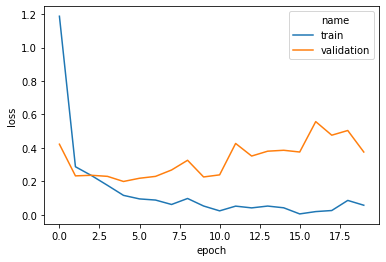

In [95]:
loss_plot = visualize.learning_curves("loss", metrics_df)

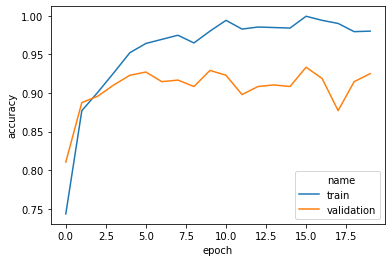

In [96]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

### Learning rate 0.3

In [99]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

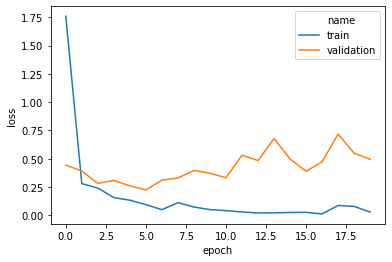

In [100]:
loss_plot = visualize.learning_curves("loss", metrics_df)

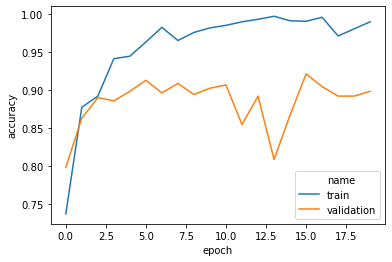

In [101]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

### Learning rate 0.1

In [104]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

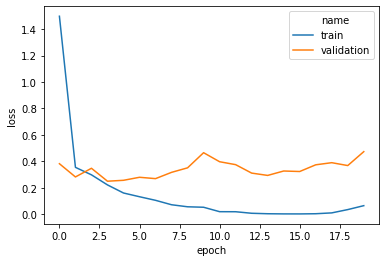

In [105]:
loss_plot = visualize.learning_curves("loss", metrics_df)

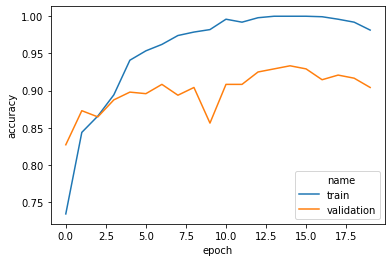

In [106]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [109]:
# Dense 128
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

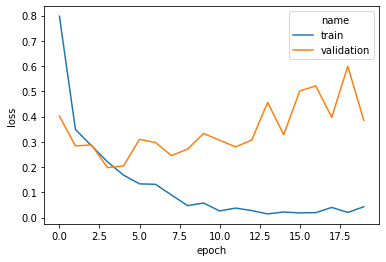

In [110]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [113]:
# Dense 1024
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

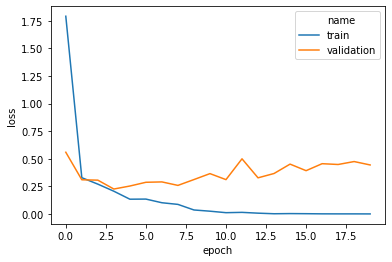

In [114]:
loss_plot = visualize.learning_curves("loss", metrics_df)

## Training dataset size increased

In [9]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

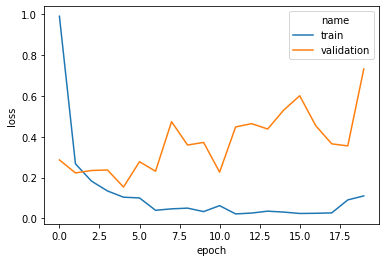

In [10]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [9]:
### 0.05

model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

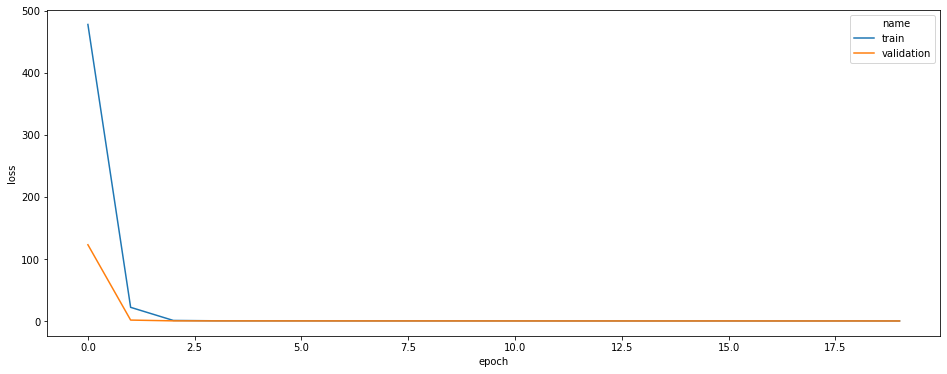

In [10]:
plt.figure(figsize=(16, 6))
loss_plot = visualize.learning_curves("loss", metrics_df)

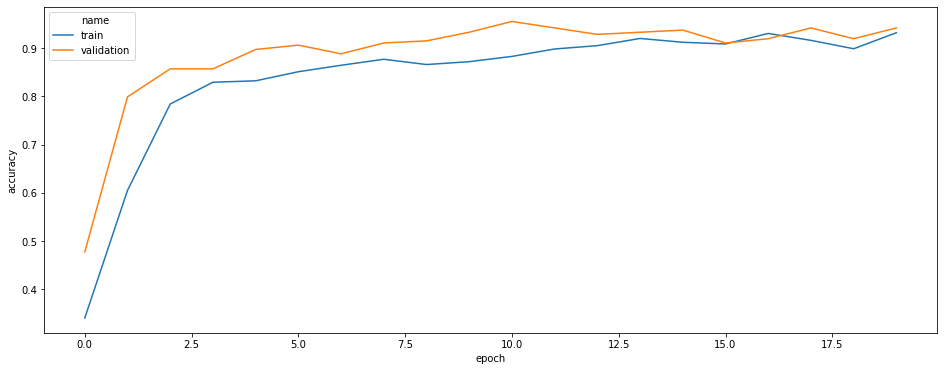

In [11]:
plt.figure(figsize=(16, 6))
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)